## AISINGERS 🐳 v.3.5.1 fix CoverGen | https://t.me/aisingers  

**Чтобы быть в курсе всех обновлений и изменений в этом блокноте, рекомендую подписаться на наш [Телеграм-канал](https://t.me/aisingers)**

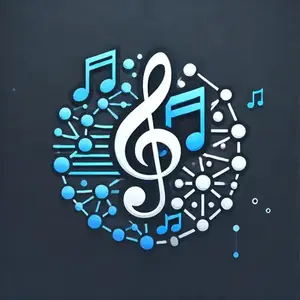

**<font color='#FF8C00'> _Ваша поддержка! <3_</font>**

<a href="https://www.donationalerts.com/r/varaslaw">
  <img src="https://www.donationalerts.com/img/brand/donationalerts.svg" width="200" alt="Donationalerts">
</a>

♫⋆｡♪ ₊˚♬ ﾟ.♫⋆｡♪ ₊˚♬ ﾟ.♫⋆｡♪ ₊˚♬ ﾟ.

In [ ]:
# @title 🐳 Клонирование репозитория
from IPython.display import clear_output
import os

# @markdown ---
# @markdown Наш ТГ: https://t.me/aisingers

# Клонирование репозитория
repo_url = "https://github.com/varaslaw/AISingersCoverGen"
repo_dir = "/content/AISingersCoverGen"

# Проверка, существует ли уже репозиторий
if not os.path.exists(repo_dir):
    print("Клонирование репозитория...")
    !git clone {repo_url}

# Удаление sample_data, если существует
!rm -rf /content/sample_data

# Переход в директорию репозитория
%cd {repo_dir}

# Проверка, что репозиторий клонирован и в нем есть файлы
if not os.listdir(repo_dir):
    print("Ошибка: Репозиторий пуст. Проверьте структуру репозитория.")
    raise SystemExit("Завершаем выполнение.")

print("Репозиторий успешно клонирован и зависимости установлены.")
clear_output()
print("Готово! Репозиторий AISingersCoverGen успешно клонирован и настроен.")


Готово! Репозиторий AISingersCoverGen успешно клонирован и настроен.


In [ ]:
#@title 🐳 Установка библиотек (стек 2025)
#@markdown Устанавливаем основные зависимости из requirements.txt и клиенты загрузки моделей. Без ручной перестановки Python и лишних `sed`.
import os, platform

repo_dir = "/content/AISingersCoverGen"
%cd $repo_dir

print("🔧 Обновляем pip и wheel...")
!python -m pip install -U pip wheel

print("📦 Устанавливаем зависимости из requirements.txt (Gradio 4.x, torch/cu118)...")
!python -m pip install -r requirements.txt

print("🔗 Клиенты для загрузки моделей (gdown, Mega, tenacity, cryptography)...")
!python -m pip install -U gdown mega.py tenacity cryptography

import torch
_device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Python {platform.python_version()} | Torch {torch.__version__} | CUDA {torch.version.cuda} | device: {_device}")

print("⬇️ Скачиваем hubert и MDXNET модели...")
!python src/download_models.py

print("✅ Установка завершена. Можно переходить к следующей ячейке.")



In [ ]:
#@title 🔍 Быстрая проверка импортов (опционально)
#@markdown Выполняйте только при проблемах со стартом: убеждаемся, что ключевые библиотеки доступны.
import importlib

for pkg in ["gradio", "torch", "librosa", "fairseq", "mega"]:
    importlib.import_module(pkg)
    print(f"✓ {pkg} OK")

print("Все ключевые пакеты импортируются корректно.")



In [ ]:
#@title 🐳 Запуск WebUI ▶︎ •၊၊||၊|။|||| |
#@markdown ---
from IPython.display import clear_output
import time, os, gradio

runpice = 'src/webui-ru.py'
Url = "Gradio" #@param ['Gradio','Ngrok','Cloudflared']
Token = "" #@param {type:"string"}

print(f"Gradio версия: {gradio.__version__}")

if Url == "Gradio":
    !python $runpice --share
elif Url == "Cloudflared":
    !curl -LO https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64.deb
    !dpkg -i cloudflared-linux-amd64.deb
    !rm -rf nohup.out
    !nohup cloudflared tunnel --url localhost:7860 &
    clear_output()
    time.sleep(5)
    !grep -oE "https://[a-zA-Z0-9.-]+\.trycloudflare\.com" nohup.out
    !python $runpice --listen-port 7860
else:
    !python -m pip install pyngrok
    from pyngrok import ngrok
    ngrok.set_auth_token(Token)
    ngrok.kill()
    cover_tunnel = ngrok.connect(7860)
    print("URL CoverGen:", cover_tunnel.public_url)
    !python $runpice --listen-port 7860



### 💡 Советы по использованию Google Colab


Если вычислительные мощности видеокарты T4 закончены:

Запустите этот блокнот на другом Google аккаунте.